In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/starbucks.csv')

## 5.1 The linear model
- simple linear regression
$$y_t = \beta_0 + \beta_1 x_t + \varepsilon_t$$

- multiple linear regression
$$y_t = \beta_{0} + \beta_{1} x_{1,t} + \beta_{2} x_{2,t} + \cdots + \beta_{k} x_{k,t} + \varepsilon_t$$

- Assumption
    - about target and predictor variables
        - linear relationship
    - about the errors
        - mean zero
        - not autocorrelated
        - unrelated to the predictor variables

In [4]:
# statsmodels package
import statsmodels.api as sm

In [5]:
data.head(3)

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340


In [8]:
# linear regression fitting(=learning, training)
X = data['Close']
X = sm.add_constant(X)
y = data['Volume']
model0 = sm.OLS(y, X)
result0 = model0.fit()

In [9]:
result0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4261
Date:                Mon, 06 Jul 2020   Prob (F-statistic):              0.514
Time:                        14:43:36   Log-Likelihood:                -16941.
No. Observations:                1006   AIC:                         3.389e+04
Df Residuals:                    1004   BIC:                         3.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.472e+06   1.76e+06      4.811      0.000    5.02e+06    1.19e+07
Close       2.118e+04   3.24e+04      0.653      0.514   -4.25e+04    8.48e+04
==============================================================================
Omnibus:                      912.821   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35938.452
Skew:                           4.080   Prob(JB):                         0.00
Kurtosis:                      31.121   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
result0.params

const    8.472404e+06
Close    2.117616e+04
dtype: float64

In [11]:
result0.predict(X)[:5]

0    9.277228e+06
1    9.261811e+06
2    9.255389e+06
3    9.274659e+06
4    9.287604e+06
dtype: float64

## 5.3 Evaluation the regression model
- it is necessary to plot the residuals to check that the assumptions of the model have been satisfied
- Acf plot of residuals
- Histogram of residuals
- Residual plots against fitted values
- Outlier and influential observations

- https://www.scikit-yb.org/en/latest/index.html : machine learing vis

In [12]:
result0.resid[:3]

0   -2.371130e+06
1    2.361985e+06
2   -1.591049e+06
dtype: float64

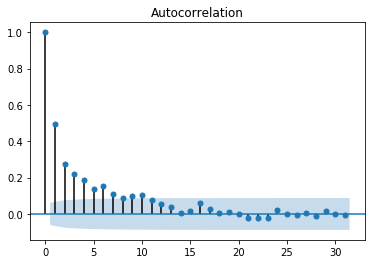

In [13]:
# acf plot of residuals
sm.graphics.tsa.plot_acf(result0.resid)
plt.show()

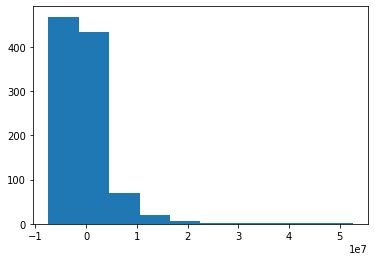

In [14]:
# histgram of acf
plt.hist(result0.resid)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


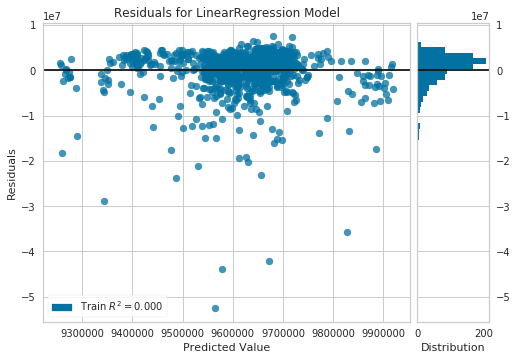

In [15]:
# !conda install -c districtdatalabs yellowbrick -y
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

sklearnModel = LinearRegression()
vis = ResidualsPlot(sklearnModel)

vis.fit(X,y)
# vis.score(X_test, y_test) : you can vis with test and train
vis.show()

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/regressor/influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


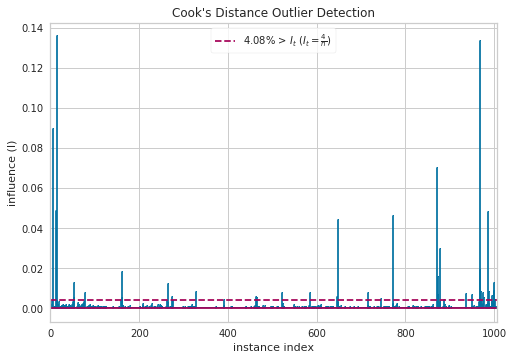

In [16]:
# Outlier and influential observations
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

## 5.4 Some useful predictors
- Trend : $y_t = \beta_0 + \beta_1 t + \epsilon_t$ (using time)
- Dummy variables : public holiday, outlier
- Seasonal dummy variables
- Intervection variables : ex) competitor activity, industrial action
- Trading days : ex) number of Sundays in month
- Distributed lags
- Easter
- Fourier series

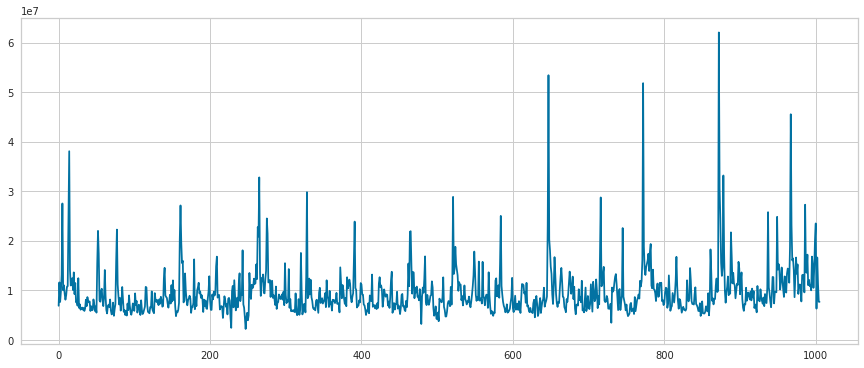

In [29]:
data['Volume'].plot(figsize=(15,6))

In [30]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['weekday'] = data['Date'].dt.weekday # monday : 0 ~

In [31]:
data.head(3)

,Date,Close,Volume,year,month,day,weekday
0,2015-01-02,38.0061,6906098,2015,1,2,4
1,2015-01-05,37.2781,11623796,2015,1,5,0
2,2015-01-06,36.9748,7664340,2015,1,6,1


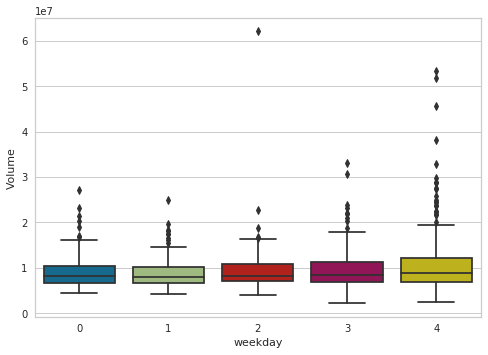

In [46]:
sns.boxplot(data=data, x='weekday', y='Volume')

In [60]:
# outlier
tmp = (data['Volume'] > data['Volume'].quantile(0.99)).sum()
print(f'how many outlier? {tmp}')

data['outlier'] = data['Volume'] > data['Volume'].quantile(0.99)
data['outlier'] = data['outlier'].astype('int')

how many outlier? 11


In [65]:
print(data.dtypes)
print(f'shape : {data.shape}')
data.head(3)

Date       datetime64[ns]
Close             float64
Volume              int64
year                int64
month               int64
day                 int64
weekday             int64
outlier             int64
dtype: object
shape : (1006, 8)


,Date,Close,Volume,year,month,day,weekday,outlier
0,2015-01-02,38.0061,6906098,2015,1,2,4,0
1,2015-01-05,37.2781,11623796,2015,1,5,0,0
2,2015-01-06,36.9748,7664340,2015,1,6,1,0


In [73]:
# linear regression fitting(=learning, training)
X = data[['Close','year','month','day','weekday','outlier']]
X = sm.add_constant(X)
y = data['Volume']
model1 = sm.OLS(y, X)
result1 = model1.fit()

In [74]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):          6.03e-117
Time:                        15:38:37   Log-Likelihood:                -16662.
No. Observations:                1006   AIC:                         3.334e+04
Df Residuals:                     999   BIC:                         3.337e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.486e+09   2.56e+08     -5.813      0.000   -1.99e+09   -9.84e+08
Close      -5.611e+04   3.11e+04     -1.805      0.071   -1.17e+05    4905.312
year        7.427e+05   1.27e+05      5.839      0.000    4.93e+05    9.92e+05
month       2.569e+04    3.8e+04      0.677      0.499   -4.88e+04       1e+05
day          640.1938   1.37e+04      0.047      0.963   -2.62e+04    2.75e+04
weekday      2.76e+05    8.6e+04      3.210      0.001    1.07e+05    4.45e+05
outlier     2.937e+07   1.16e+06     25.254      0.000    2.71e+07    3.17e+07
==============================================================================
Omnibus:                      364.465   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1430.846
Skew:                           1.703   Prob(JB):                    1.98e-311
Kurtosis:                       7.747   Cond. No.                     4.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5.5 Selecting predictors
- $R^2$
- CV
- AIC
- BIC
- stepwise regression